# Analysis of NHANES Questionnaire Repsonses


In [23]:
#import relevant packages
import json
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


from fhirclient import client
from fhirclient import server
import fhirclient.models.questionnaire as q
import fhirclient.models.patient as p
import fhirclient.models.humanname as hn
import fhirclient.models.questionnaireresponse as qr


In [2]:
#read in JSON Questionnaire response files for physical activity:
pa_responses = []
for filename1 in os.listdir('pa_questionnaire_responses'):
    with open("pa_questionnaire_responses/" + filename1, 'r') as qr_file1:
        qrjson1 = json.load(qr_file1)
        pa_qr1 = qr.QuestionnaireResponse(qrjson1)
        pa_responses.append(pa_qr1)
              
#read in JSON Questionnaire response files for mental health:
mh_responses = []
for filename2 in os.listdir('mh_questionnaire_responses'):
    with open("mh_questionnaire_responses/" + filename2, 'r') as qr_file2:
        qrjson2 = json.load(qr_file2)
        pa_qr2 = qr.QuestionnaireResponse(qrjson2)
        mh_responses.append(pa_qr2)

In [153]:
#pull pysical activity questionnaire response data from SMART model and structure as pandas data frame
pa_arrays = []
for response in pa_responses:
    rowid = response.identifier.value
    #string Null
    row = [rowid, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
    for answers in response.item:
        if answers.linkId == 'PAQ605':
            row[1] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ610':
            row[2] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD615':
            row[3] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ620':
            row[4] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ625':
            row[5] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD630':
            row[6] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ635':
            row[7] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ640':
            row[8] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD645':
            row[9] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ650':
            row[10] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ655':
            row[11] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD660':
            row[12] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ665':
            row[13] = answers.answer[0].valueInteger
        if answers.linkId == 'PAQ670':
            row[14] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD675':
            row[15] = answers.answer[0].valueInteger
        if answers.linkId == 'PAD680':
            row[16] = answers.answer[0].valueInteger
    pa_arrays.append(row)

pa_df = pd.DataFrame(pa_arrays, columns =['ID', 'PAQ605', 'PAQ610', 'PAD615', 'PAQ620', 'PAQ625', 'PAD630', 'PAQ635', 'PAQ640', 'PAD645', 'PAQ650', 'PAQ655', 'PAD660', 'PAQ665', 'PAQ670', 'PAD675', 'PAD680']) 
pa_df = pa_df.fillna(value=np.nan)
pa_df["ID"] = pd.to_numeric(pa_df["ID"])
pa_df.astype('int32', errors='ignore').dtypes
pa_df

,ID,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680
0,96696,2,NaN,120.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,60.0,60.0
1,102554,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,NaN,20.0
2,99563,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,NaN,120.0
3,99099,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,NaN,9999.0
4,99133,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,NaN,960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,99632,2,NaN,180.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,60.0,60.0
5852,100638,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,15.0,60.0
5853,102605,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,NaN,480.0
5854,98920,2,NaN,480.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,3,60.0,60.0


In [154]:
#pull mental health questionnaire response data from SMART model and structure as pandas data frame
mh_arrays = []
for response in mh_responses:
    rowid = response.identifier.value
    #string Null
    row = [rowid, None, None, None, None, None, None, None, None, None, None]
    if response.item != None:
        for answers in response.item:
            if answers.linkId == 'DPQ010':
                row[1] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ020':
                row[2] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ030':
                row[3] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ040':
                row[4] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ050':
                row[5] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ060':
                row[6] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ070':
                row[7] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ080':
                row[8] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ090':
                row[9] = answers.answer[0].valueInteger
            if answers.linkId == 'DPQ100':
                row[10] = answers.answer[0].valueInteger
    mh_arrays.append(row)

mh_df = pd.DataFrame(mh_arrays, columns =['ID', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']) 
mh_df = mh_df.fillna(value=np.nan)
mh_df["ID"] = pd.to_numeric(mh_df["ID"])
mh_df.astype('int32', errors='ignore').dtypes
mh_df

,ID,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,96696,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,102554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99563,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,99099,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,99133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5528,94450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5529,99632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5530,100638,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5531,102605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [155]:
#load demographic data
for filename1 in os.listdir('nhanes_data'):
    with open("nhanes_data/demographic_data.csv", 'r') as demo1:
        demo_df = pd.read_csv(demo1)

demo_df = demo_df.rename(columns={'seqn': 'ID'})
demo_df = demo_df.fillna(value=np.nan)
demo_df["ID"] = pd.to_numeric(demo_df["ID"])
demo_df

,Unnamed: 0,ID,sddsrvyr,ridstatr,riagendr,ridageyr,ridagemn,ridreth1,ridreth3,ridexmon,...,dmdhredz,dmdhrmaz,dmdhsedz,wtint2yr,wtmec2yr,sdmvpsu,sdmvstra,indhhin2,indfmin2,indfmpir
0,1,93703,10,2,2,2,NaN,5,6,2.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2,145,15.0,15.0,5.00
1,2,93704,10,2,1,2,NaN,3,3,1.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1,143,15.0,15.0,5.00
2,3,93705,10,2,2,66,NaN,4,4,2.0,...,1.0,2.0,NaN,8614.571172,8338.419786,2,145,3.0,3.0,0.82
3,4,93706,10,2,1,18,NaN,5,6,2.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2,134,NaN,NaN,NaN
4,5,93707,10,2,1,13,NaN,5,7,2.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1,138,10.0,10.0,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,9250,102952,10,2,2,70,NaN,5,6,2.0,...,2.0,1.0,1.0,16896.276203,18338.711104,2,138,4.0,4.0,0.95
9250,9251,102953,10,2,1,42,NaN,1,1,2.0,...,2.0,2.0,NaN,61630.380013,63661.951573,2,137,12.0,12.0,NaN
9251,9252,102954,10,2,2,41,NaN,4,4,1.0,...,2.0,2.0,NaN,17160.895269,17694.783346,1,144,10.0,10.0,1.18
9252,9253,102955,10,2,2,14,NaN,4,4,2.0,...,2.0,1.0,2.0,14238.445922,14871.839636,1,136,9.0,9.0,2.24


In [156]:
#merge demographics data with PAQ and DPQ dataframes and add age grouped column:

#for paq
pa_demo_df = pa_df.merge(demo_df, on='ID', how='left')
#stratify by age
pa_demo_df.loc[pa_demo_df['ridageyr'] <= 10, 'Age_Group'] = '0-10' 
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 10) & (pa_demo_df['ridageyr'] <= 20)), 'Age_Group'] = '11-20'
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 20) & (pa_demo_df['ridageyr'] <= 30)), 'Age_Group'] = '21-30'
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 30) & (pa_demo_df['ridageyr'] <= 40)), 'Age_Group'] = '31-40'  
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 40) & (pa_demo_df['ridageyr'] <= 50)), 'Age_Group'] = '41-50'  
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 50) & (pa_demo_df['ridageyr'] <= 60)), 'Age_Group'] = '51-60'
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 60) & (pa_demo_df['ridageyr'] <= 70)), 'Age_Group'] = '61-70' 
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 70) & (pa_demo_df['ridageyr'] <= 80)), 'Age_Group'] = '71-80' 
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 80) & (pa_demo_df['ridageyr'] <= 90)), 'Age_Group'] = '81-90'  
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 90) & (pa_demo_df['ridageyr'] <= 100)), 'Age_Group'] = '91-100'  
pa_demo_df.loc[((pa_demo_df['ridageyr'] > 100) & (pa_demo_df['ridageyr'] <= 110)), 'Age_Group'] = '101-110'  
#print output   
pa_demo_df


#for dpq
mh_demo_df = mh_df.merge(demo_df, on='ID', how='left')
#stratify by age
mh_demo_df.loc[mh_demo_df['ridageyr'] <= 10, 'Age_Group'] = '0-10' 
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 10) & (mh_demo_df['ridageyr'] <= 20)), 'Age_Group'] = '11-20'
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 20) & (mh_demo_df['ridageyr'] <= 30)), 'Age_Group'] = '21-30'
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 30) & (mh_demo_df['ridageyr'] <= 40)), 'Age_Group'] = '31-40'  
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 40) & (mh_demo_df['ridageyr'] <= 50)), 'Age_Group'] = '41-50'  
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 50) & (mh_demo_df['ridageyr'] <= 60)), 'Age_Group'] = '51-60'
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 60) & (mh_demo_df['ridageyr'] <= 70)), 'Age_Group'] = '61-70' 
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 70) & (mh_demo_df['ridageyr'] <= 80)), 'Age_Group'] = '71-80' 
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 80) & (mh_demo_df['ridageyr'] <= 90)), 'Age_Group'] = '81-90'  
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 90) & (mh_demo_df['ridageyr'] <= 100)), 'Age_Group'] = '91-100'  
mh_demo_df.loc[((mh_demo_df['ridageyr'] > 100) & (mh_demo_df['ridageyr'] <= 110)), 'Age_Group'] = '101-110'
#print output
mh_demo_df


,ID,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,dmdhrmaz,dmdhsedz,wtint2yr,wtmec2yr,sdmvpsu,sdmvstra,indhhin2,indfmin2,indfmpir,Age_Group
0,96696,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,NaN,19067.779471,19536.314548,2,135,4.0,4.0,0.72,11-20
1,102554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,34564.401851,33123.825915,1,135,6.0,6.0,1.34,61-70
2,99563,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,NaN,21657.512521,24869.955984,1,144,77.0,77.0,NaN,51-60
3,99099,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,NaN,14782.719547,14190.513923,2,137,6.0,6.0,1.64,41-50
4,99133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,NaN,37414.390590,39692.573371,1,145,5.0,5.0,1.68,71-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,94450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,NaN,69523.436200,71155.451746,2,135,7.0,7.0,1.36,21-30
5529,99632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,65503.049774,78125.730356,2,141,15.0,15.0,5.00,11-20
5530,100638,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,27438.863757,29404.213568,1,148,12.0,12.0,NaN,41-50
5531,102605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,16809.506293,21044.522688,1,138,6.0,6.0,1.85,51-60


In [163]:
#group datasets by age group for visualization:

#for PAQ
pa_df_grouped = pa_demo_df.groupby('Age_Group').agg('mean')
pa_df_grouped = pa_df_grouped[['PAQ605', 'PAQ610', 'PAD615', 'PAQ620', 'PAQ625', 'PAD630', 'PAQ635', 'PAQ640', 'PAD645', 'PAQ650', 'PAQ655', 'PAD660', 'PAQ665', 'PAQ670', 'PAD675', 'PAD680']]
pa_df_grouped

#for DPQ
mh_df_grouped = mh_demo_df.groupby('Age_Group').agg('mean')
mh_df_grouped = mh_df_grouped[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']]
mh_df_grouped


,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
Age_Group,,,,,,,,,,
11-20,0.370968,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21-30,0.373626,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
31-40,0.360434,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41-50,0.390177,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
51-60,0.467045,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
61-70,0.415598,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
71-80,0.383615,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


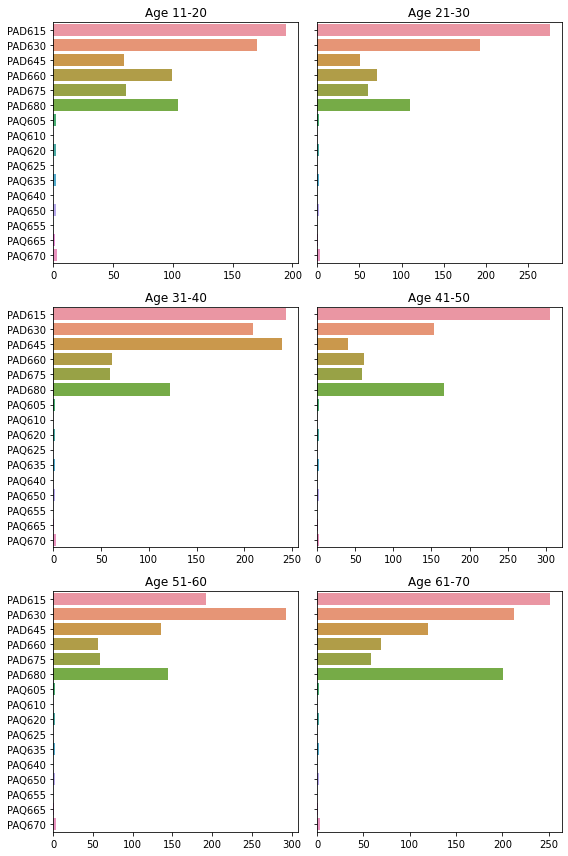

In [172]:
#visualize physical activity age stratified average responses:

def plot_by_age_group(groupby_count_obj, age_group, ax=None):    
    sorting = groupby_count_obj.loc[age_group].sort_index().index
    sns.barplot(y = groupby_count_obj.loc[age_group].index, 
                x = groupby_count_obj.loc[age_group].values, 
                order = sorting,  
                ax = ax
                ).set_title("Age {}".format(age_group))


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 12), sharey=True)
for subplot, Age_Group in zip(ax.flatten(), list(pa_df_grouped.index)[:-1]):
    plot_by_age_group(pa_df_grouped, Age_Group, ax=subplot)
    
plt.tight_layout()



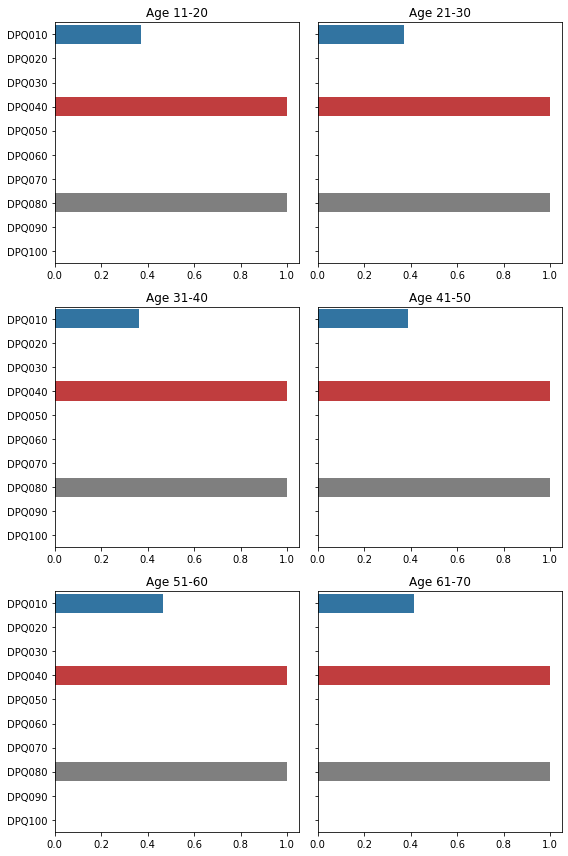

In [173]:
#visualize mental health age stratified average responses:

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 12), sharey=True)
for subplot, Age_Group in zip(ax.flatten(), list(mh_df_grouped.index)[:-1]):
    plot_by_age_group(mh_df_grouped, Age_Group, ax=subplot)
    
plt.tight_layout()


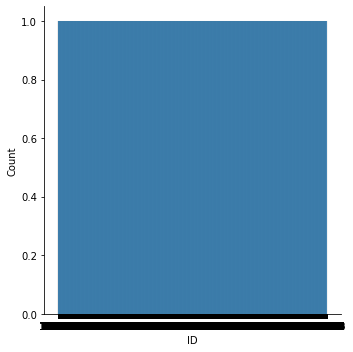

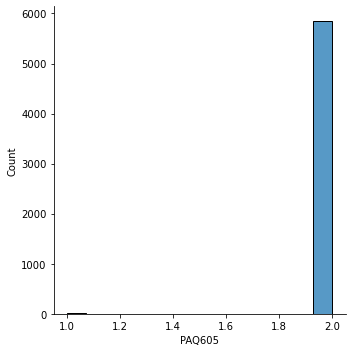

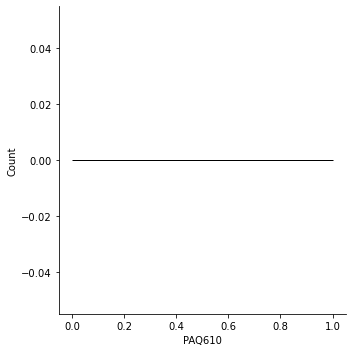

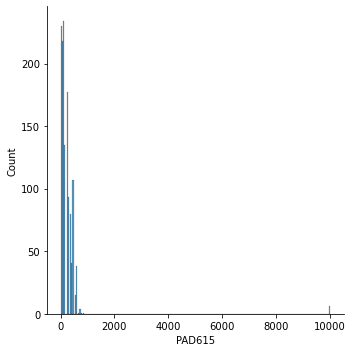

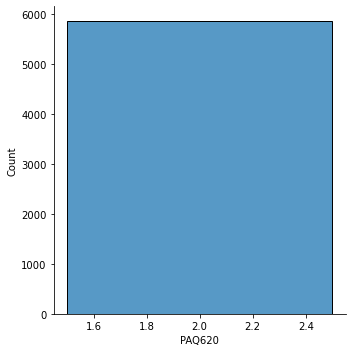

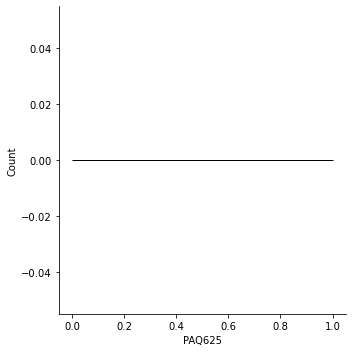

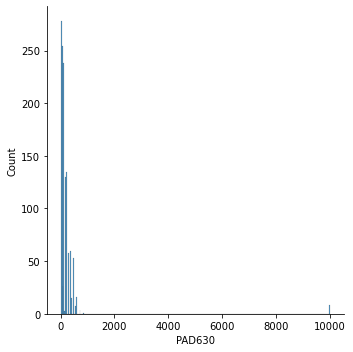

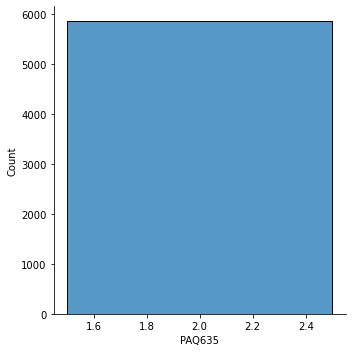

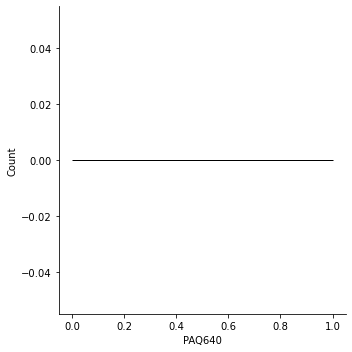

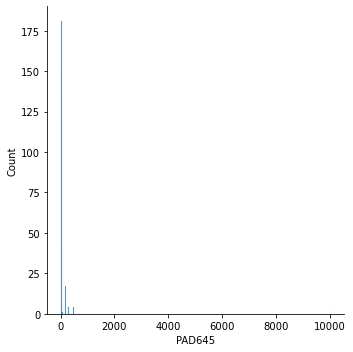

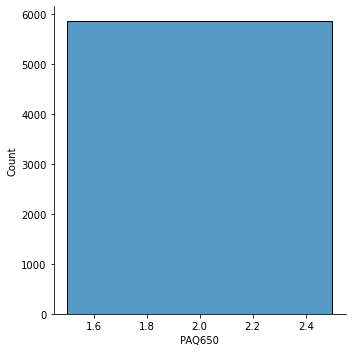

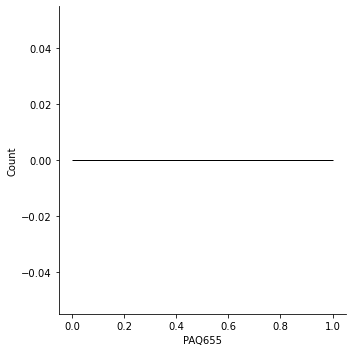

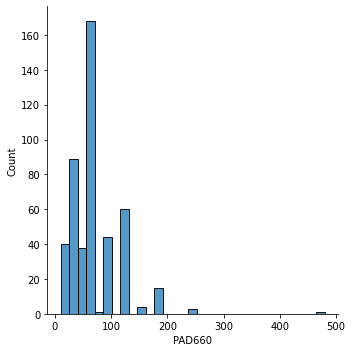

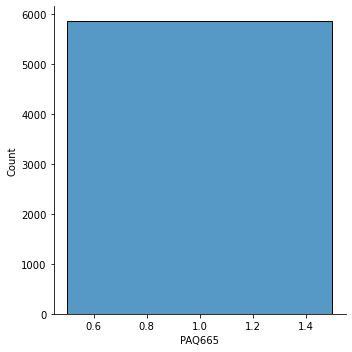

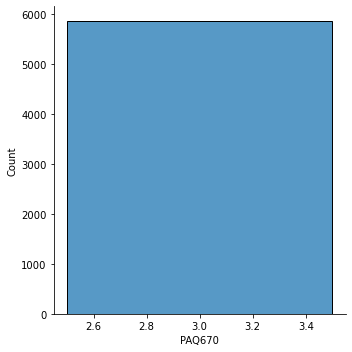

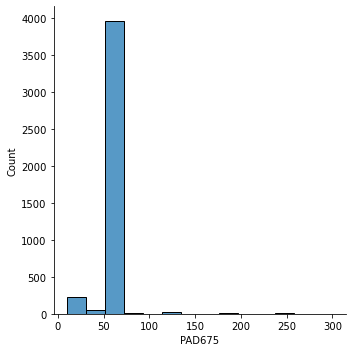

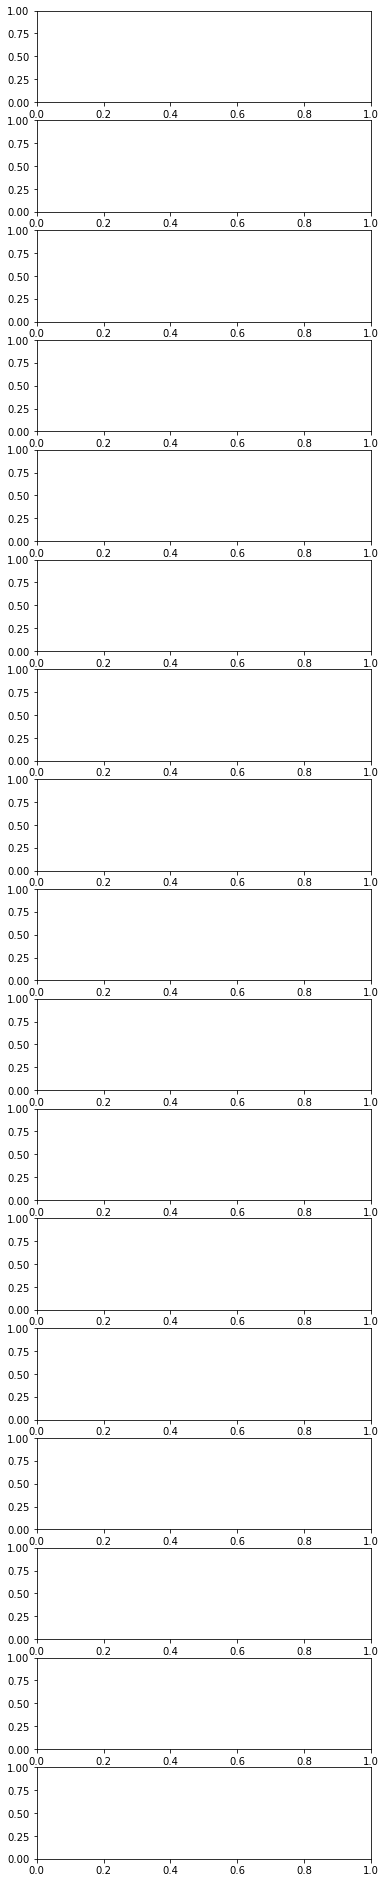

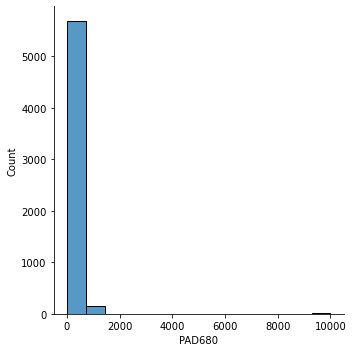

In [37]:
#visualize physical activity responses:
n=len(pa_df.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*2))
for i in range(n):
    plt.sca(ax[i])
    col = pa_df.columns[i]
    sns.displot(pa_df[col])


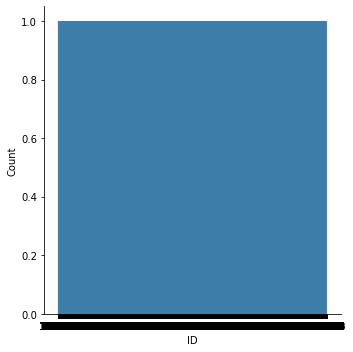

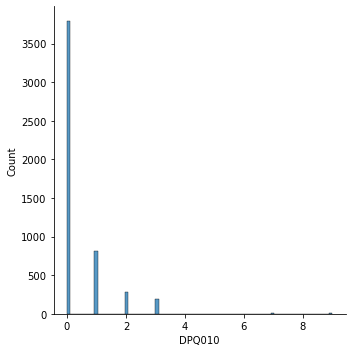

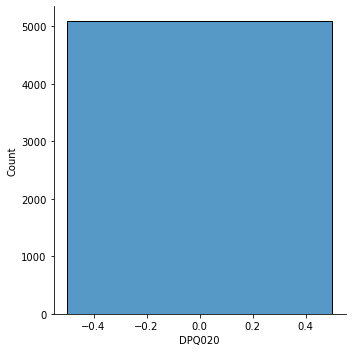

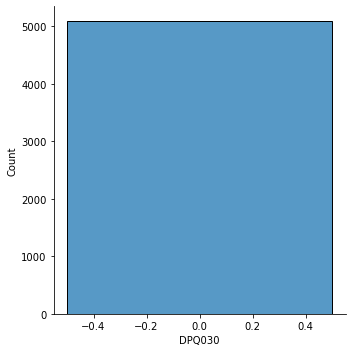

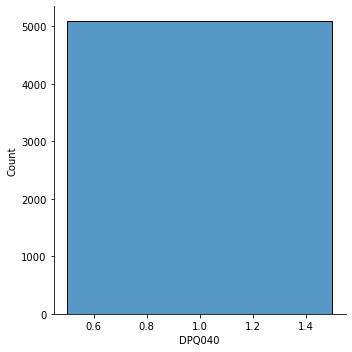

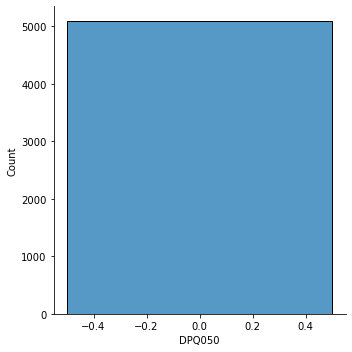

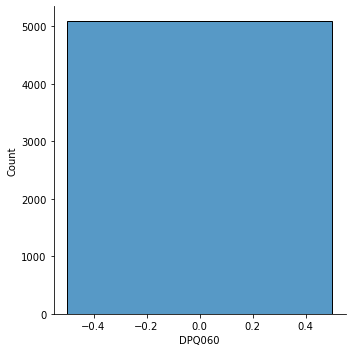

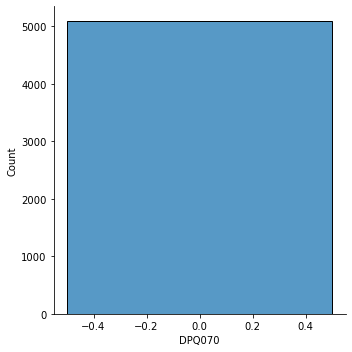

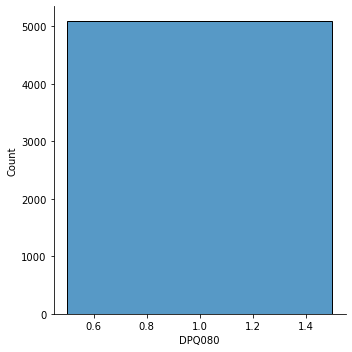

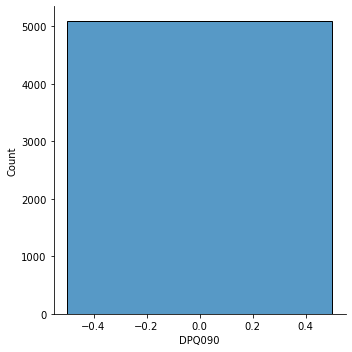

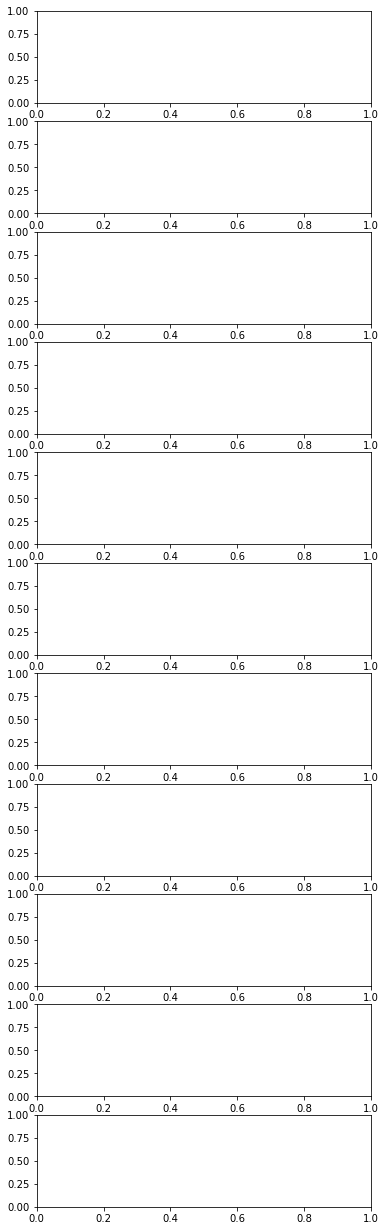

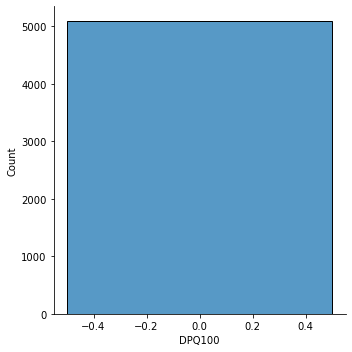

In [38]:
#visualize mental health responses:
n=len(mh_df.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*2))
for i in range(n):
    plt.sca(ax[i])
    col = mh_df.columns[i]
    sns.displot(mh_df[col])
    

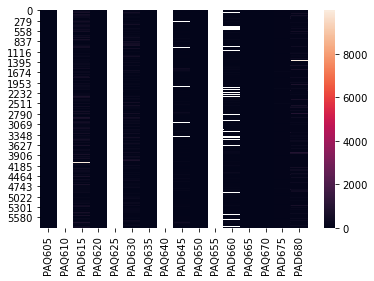

In [11]:
#heatmap of physical activity responses
pa_mat = pa_df.drop(['ID'], axis=1)
plt1 = sns.heatmap(pa_mat, mask=pa_mat.isnull())


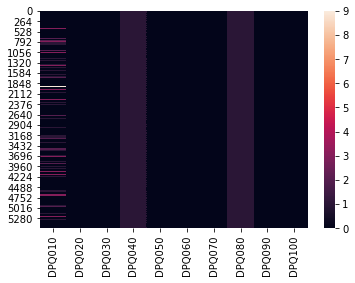

In [10]:
#heatmap of mental health responses
mh_mat = mh_df.drop(['ID'], axis=1)
plt2 = sns.heatmap(mh_mat, mask=mh_mat.isnull())


In [42]:
# correlations




In [140]:
mh_responses[0].as_json()


{'identifier': {'system': 'https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DPQ_J.htm',
  'value': '96696'},
 'item': [{'answer': [{'valueInteger': 1}],
   'linkId': 'DPQ010',
   'text': 'Over the last 2 weeks, how often have you been bothered by the following problems: little interest or pleasure in doing things? Would you say...'},
  {'answer': [{'valueInteger': 0}],
   'linkId': 'DPQ020',
   'text': '[Over the last 2 weeks, how often have you been bothered by the following problems:] feeling down, depressed, or hopeless?'},
  {'answer': [{'valueInteger': 0}],
   'linkId': 'DPQ030',
   'text': '[Over the last 2 weeks, how often have you been bothered by the following problems:] trouble falling or staying asleep, or sleeping too much?'},
  {'answer': [{'valueInteger': 1}],
   'linkId': 'DPQ040',
   'text': '[Over the last 2 weeks, how often have you been bothered by the following problems:] feeling tired or having little energy?'},
  {'answer': [{'valueInteger': 0}],
   'linkId': 'DPQ050',
